# N-gram statistics of EHR v. NLP datasets

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import pandas as pd
import seaborn as sns
import os
sns.set_context("paper")
sns.set_style('whitegrid', rc={
    'xtick.bottom': True,
    'ytick.left': True,
}) 

What percentage of n-grams are repeated?

In [4]:
def plot_percentage_n_grams_repeated(ax, values, n: int, color: str, label: str = 'patients'):
    ax.hist(values, bins=20, edgecolor='black', color=color)
    ax.set_title(f"# of {label.title()} with a given {n}-gram repetition rate")
    ax.set_ylabel(f"# of {label.title()}")
    ax.set_xlabel(f"Repetition Rate of {n}-grams (i.e. % of {n}-grams that are repeated)")
tab10_colors = sns.color_palette("tab10")   

# NLP

In [2]:
if os.path.exists('cache/nlp/df_rr_1.parquet'):
    df_rr_1 = pd.read_parquet('cache/nlp/df_rr_1.parquet')
    df_rr_2 = pd.read_parquet('cache/nlp/df_rr_2.parquet')
    df_rr_3 = pd.read_parquet('cache/nlp/df_rr_3.parquet')
    df_rr_4 = pd.read_parquet('cache/nlp/df_rr_4.parquet')
else:
    df1 = pd.read_parquet('/share/pi/nigam/mwornow/hf_ehr/hf_ehr/notebooks/wikitext-103--ngrams--1.parquet')
    df2 = pd.read_parquet('/share/pi/nigam/mwornow/hf_ehr/hf_ehr/notebooks/wikitext-103--ngrams--2.parquet')
    df3 = pd.read_parquet('/share/pi/nigam/mwornow/hf_ehr/hf_ehr/notebooks/wikitext-103--ngrams--3.parquet')
    df4 = pd.read_parquet('/share/pi/nigam/mwornow/hf_ehr/hf_ehr/notebooks/wikitext-103--ngrams--4.parquet')
    df_rr_1 = df1.groupby(['idx',]).agg({ 'count' : lambda x: (x > 1).sum() / len(x) }).reset_index().rename(columns={ 'count' : f'rr_1' })
    df_rr_2 = df2.groupby(['idx',]).agg({ 'count' : lambda x: (x > 1).sum() / len(x) }).reset_index().rename(columns={ 'count' : f'rr_2' })
    df_rr_3 = df3.groupby(['idx',]).agg({ 'count' : lambda x: (x > 1).sum() / len(x) }).reset_index().rename(columns={ 'count' : f'rr_3' })
    df_rr_4 = df4.groupby(['idx',]).agg({ 'count' : lambda x: (x > 1).sum() / len(x) }).reset_index().rename(columns={ 'count' : f'rr_4' })
    # cache
    os.makedirs('cache/nlp/', exist_ok=True)
    df_rr_1.to_parquet('cache/nlp/df_rr_1.parquet', index=False)
    df_rr_2.to_parquet('cache/nlp/df_rr_2.parquet', index=False)
    df_rr_3.to_parquet('cache/nlp/df_rr_3.parquet', index=False)
    df_rr_4.to_parquet('cache/nlp/df_rr_4.parquet', index=False)

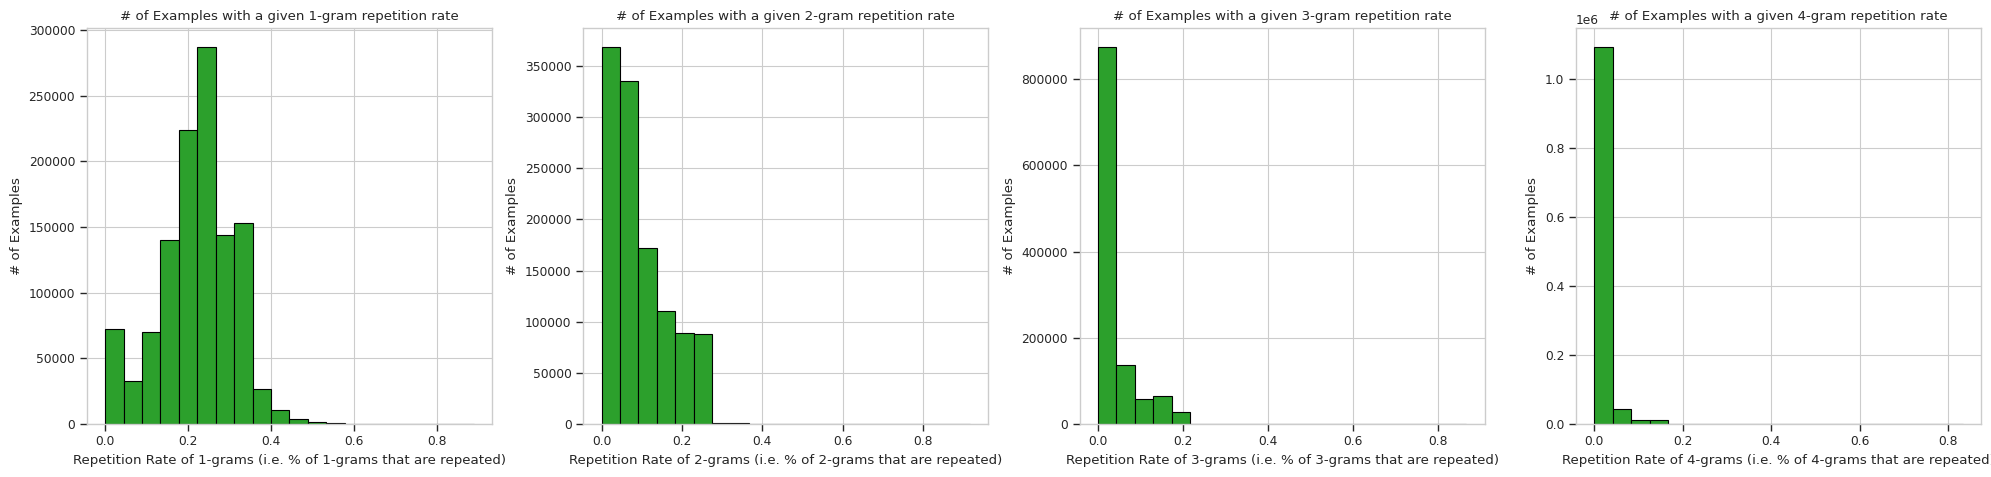

In [5]:
# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes = axes.flatten()  # Flatten the array for easy indexing

# Plot each histogram on its respective subplot
plot_percentage_n_grams_repeated(axes[0], df_rr_1['rr_1'], 1, tab10_colors[2], label='examples')
plot_percentage_n_grams_repeated(axes[1], df_rr_2['rr_2'], 2, tab10_colors[2], label='examples')
plot_percentage_n_grams_repeated(axes[2], df_rr_3['rr_3'], 3, tab10_colors[2], label='examples')
plot_percentage_n_grams_repeated(axes[3], df_rr_4['rr_4'], 4, tab10_colors[2], label='examples')

plt.tight_layout()  # Adjust layout
plt.show()

# EHR

In [6]:
if os.path.exists('cache/ehr/df_rr_1_ehr.parquet'):
    df_rr_1_ehr = pd.read_parquet('cache/ehr/df_rr_1_ehr.parquet')
    df_rr_2_ehr = pd.read_parquet('cache/ehr/df_rr_2_ehr.parquet')
    df_rr_3_ehr = pd.read_parquet('cache/ehr/df_rr_3_ehr.parquet')
    df_rr_4_ehr = pd.read_parquet('cache/ehr/df_rr_4_ehr.parquet')
else:
    df = pd.read_parquet('/share/pi/nigam/mwornow/ehrshot-benchmark/ehrshot/eda/df__starr__n_gram_counts.parquet')
    df1_ehr = df[df['n'] == 1]
    df2_ehr = df[df['n'] == 2]
    df3_ehr = df[df['n'] == 3]
    df4_ehr = df[df['n'] == 4]
    df_rr_1_ehr = df1_ehr.groupby(['pid',]).agg({ 'count' : lambda x: (x > 1).sum() / len(x) }).reset_index().rename(columns={ 'count' : f'rr_1' })
    df_rr_2_ehr = df2_ehr.groupby(['pid',]).agg({ 'count' : lambda x: (x > 1).sum() / len(x) }).reset_index().rename(columns={ 'count' : f'rr_2' })
    df_rr_3_ehr = df3_ehr.groupby(['pid',]).agg({ 'count' : lambda x: (x > 1).sum() / len(x) }).reset_index().rename(columns={ 'count' : f'rr_3' })
    df_rr_4_ehr = df4_ehr.groupby(['pid',]).agg({ 'count' : lambda x: (x > 1).sum() / len(x) }).reset_index().rename(columns={ 'count' : f'rr_4' })
    # cache
    os.makedirs('cache/ehr/', exist_ok=True)
    df_rr_1_ehr.to_parquet('cache/ehr/df_rr_1_ehr.parquet', index=False)
    df_rr_2_ehr.to_parquet('cache/ehr/df_rr_2_ehr.parquet', index=False)
    df_rr_3_ehr.to_parquet('cache/ehr/df_rr_3_ehr.parquet', index=False)
    df_rr_4_ehr.to_parquet('cache/ehr/df_rr_4_ehr.parquet', index=False)
    

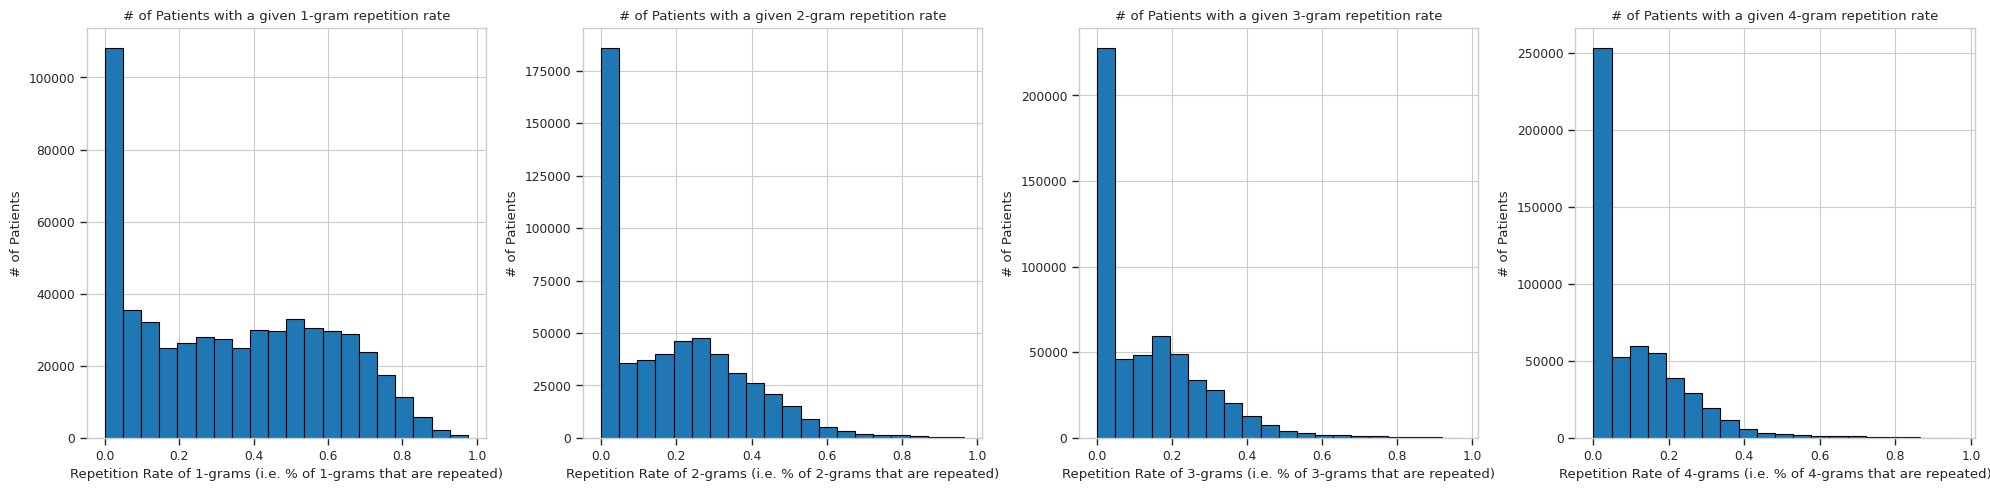

In [7]:
# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes = axes.flatten()  # Flatten the array for easy indexing

# Plot each histogram on its respective subplot
plot_percentage_n_grams_repeated(axes[0], df_rr_1_ehr['rr_1'], 1, tab10_colors[0])
plot_percentage_n_grams_repeated(axes[1], df_rr_2_ehr['rr_2'], 2, tab10_colors[0])
plot_percentage_n_grams_repeated(axes[2], df_rr_3_ehr['rr_3'], 3, tab10_colors[0])
plot_percentage_n_grams_repeated(axes[3], df_rr_4_ehr['rr_4'], 4, tab10_colors[0])

plt.tight_layout()  # Adjust layout
plt.show()

# Merged NLP v. EHR Plot

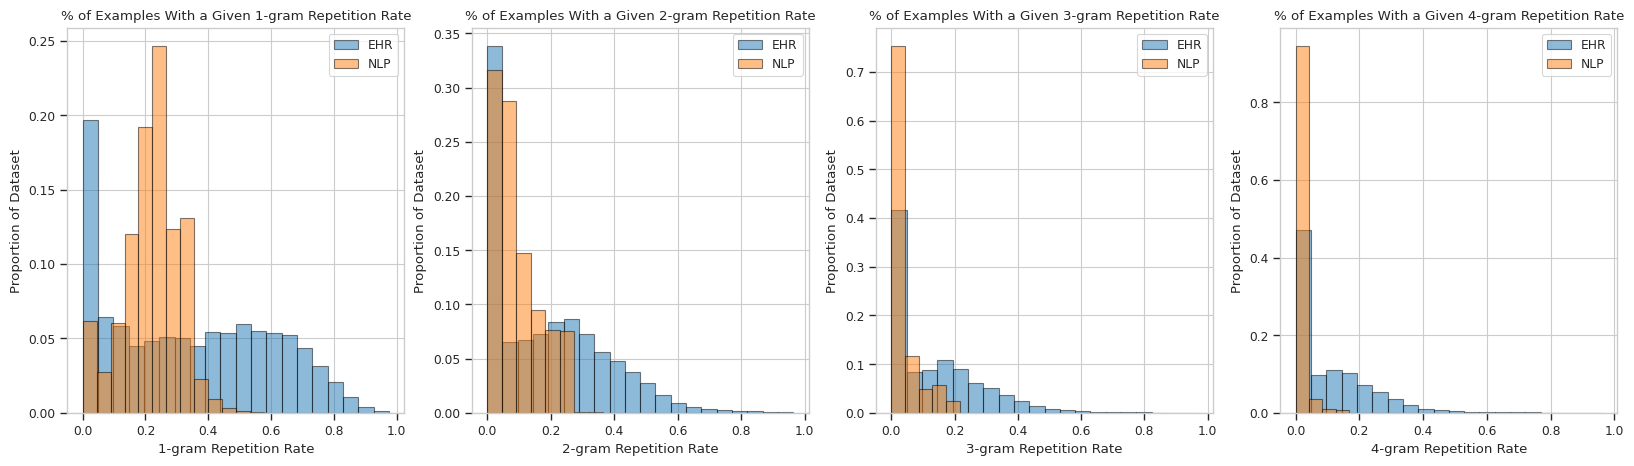

In [20]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes = axes.flatten()  # Flatten the array for easy indexing

# Plot each n-gram repetition rate histogram on its respective subplot
df_nlp = [ df_rr_1, df_rr_2, df_rr_3, df_rr_4 ]
df_ehr = [ df_rr_1_ehr, df_rr_2_ehr, df_rr_3_ehr, df_rr_4_ehr ]
for i in [1, 2, 3, 4]:
    axes[i - 1].hist(df_ehr[i - 1][f'rr_{i}'], bins=20, edgecolor='black', color=tab10_colors[0], alpha=0.5, label='EHR',
                    weights=np.ones(len(df_ehr[i - 1][f'rr_{i}'])) / len(df_ehr[i - 1][f'rr_{i}']))
    axes[i - 1].hist(df_nlp[i - 1][f'rr_{i}'], bins=20, edgecolor='black', color=tab10_colors[1], alpha=0.5, label='NLP',
                    weights=np.ones(len(df_nlp[i - 1][f'rr_{i}'])) / len(df_nlp[i - 1][f'rr_{i}']))
    axes[i - 1].set_title(f"% of Examples With a Given {i}-gram Repetition Rate")
    axes[i - 1].set_ylabel("Proportion of Dataset")
    axes[i - 1].set_xlabel(f"{i}-gram Repetition Rate")
    axes[i - 1].legend()
plt.show()

In [34]:
df = pd.read_parquet('/share/pi/nigam/mwornow/ehrshot-benchmark/ehrshot/eda/df__starr__n_gram_counts.parquet')
pid_counts = df[df['n'] == 1].groupby('pid')['count'].sum().reset_index()
pid_filtered = pid_counts[pid_counts['count'] >= 20]['pid']
df_repeated = df[df['pid'].isin(pid_filtered)]

: 

In [9]:
df1_filtered = df_repeated[df_repeated['n'] == 1]
df2_filtered = df_repeated[df_repeated['n'] == 2]
df3_filtered = df_repeated[df_repeated['n'] == 3]
df4_filtered = df_repeated[df_repeated['n'] == 4]
df_rr_1_filtered = df1_filtered.groupby(['pid',]).agg({ 'count' : lambda x: (x > 1).sum() / len(x) }).reset_index().rename(columns={ 'count' : f'rr_1' })
df_rr_2_filtered = df2_filtered.groupby(['pid',]).agg({ 'count' : lambda x: (x > 1).sum() / len(x) }).reset_index().rename(columns={ 'count' : f'rr_2' })
df_rr_3_filtered = df3_filtered.groupby(['pid',]).agg({ 'count' : lambda x: (x > 1).sum() / len(x) }).reset_index().rename(columns={ 'count' : f'rr_3' })
df_rr_4_filtered = df4_filtered.groupby(['pid',]).agg({ 'count' : lambda x: (x > 1).sum() / len(x) }).reset_index().rename(columns={ 'count' : f'rr_4' })
# df

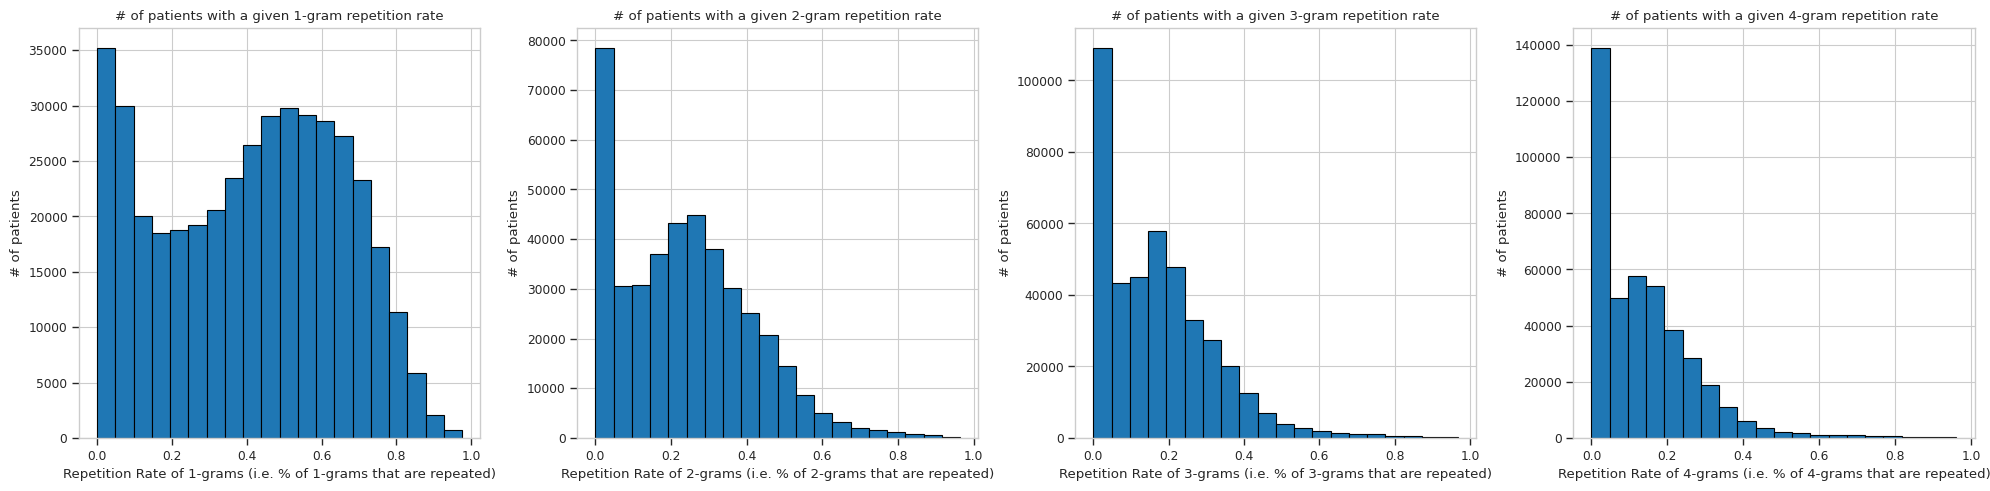

In [10]:
# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes = axes.flatten()  # Flatten the array for easy indexing

# Plot each histogram on its respective subplot
plot_percentage_n_grams_repeated(axes[0], df_rr_1_filtered['rr_1'], 1, tab10_colors[0])
plot_percentage_n_grams_repeated(axes[1], df_rr_2_filtered['rr_2'], 2, tab10_colors[0])
plot_percentage_n_grams_repeated(axes[2], df_rr_3_filtered['rr_3'], 3, tab10_colors[0])
plot_percentage_n_grams_repeated(axes[3], df_rr_4_filtered['rr_4'], 4, tab10_colors[0])

plt.tight_layout()  # Adjust layout
plt.show()

/tmp/ipykernel_1550445/3093996663.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


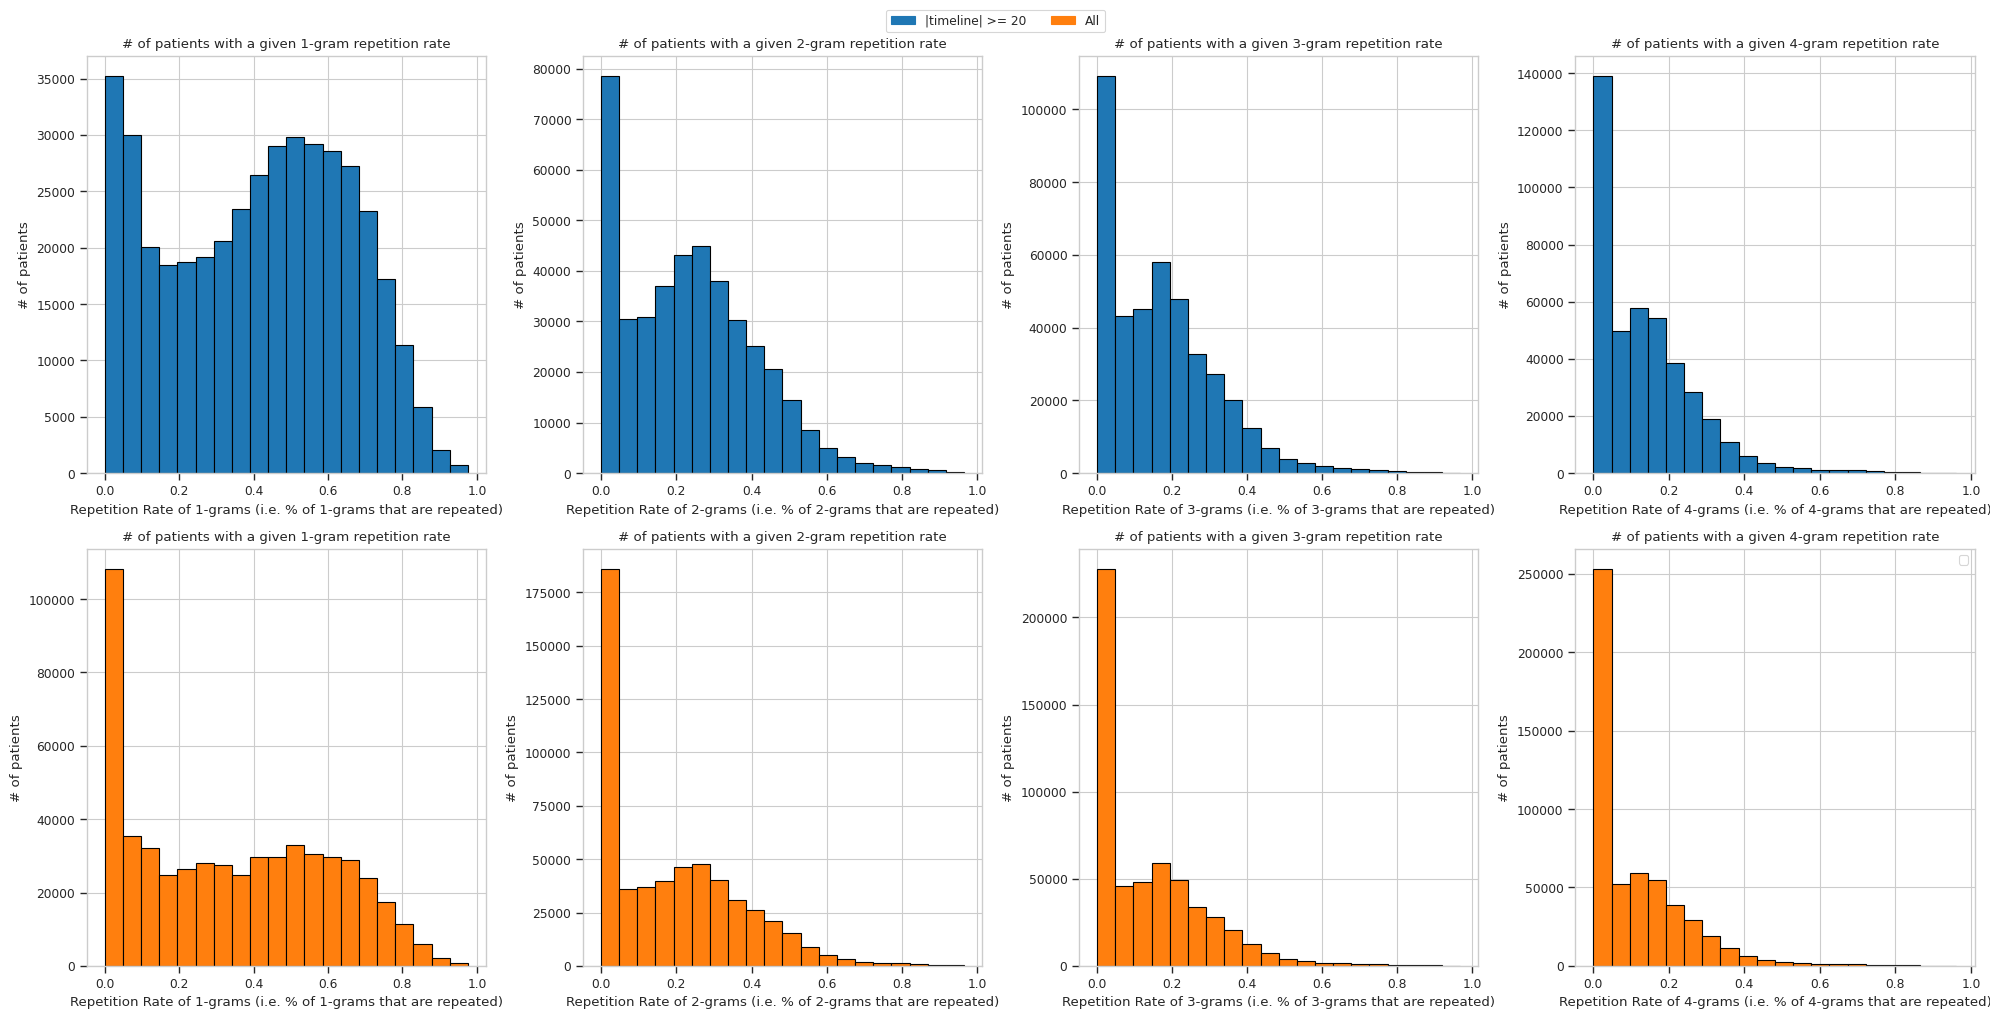

In [23]:
# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes = axes.flatten()  # Flatten the array for easy indexing

# Plot each histogram on its respective subplot
plot_percentage_n_grams_repeated(axes[0], df_rr_1_ehr['rr_1'], 1, tab10_colors[0])
plot_percentage_n_grams_repeated(axes[1], df_rr_2_ehr['rr_2'], 2, tab10_colors[0])
plot_percentage_n_grams_repeated(axes[2], df_rr_3_ehr['rr_3'], 3, tab10_colors[0])
plot_percentage_n_grams_repeated(axes[3], df_rr_4_ehr['rr_4'], 4, tab10_colors[0])

plt.tight_layout()  # Adjust layout
plt.show()